# Linear Regression using Scikit Learn


In this project we are using Scikit Learn in order to perform Linear Regression.


## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [4]:
raw_data = pd.read_csv('car_data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [6]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [8]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

Since there are total of 312 unique car models which would mean 312 dummy variables to deal with. We drop the column for now.

In [13]:
data = raw_data.drop('Model',axis =1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [15]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In this case, since there are only 172 and 150 missing values, which is less than 5 percent of the total observations, we deal with the missing values by simply removing them.

In [20]:
data_nmv = data.dropna(axis = 0)
data_nmv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the Probability Distribution Function (PDFs)

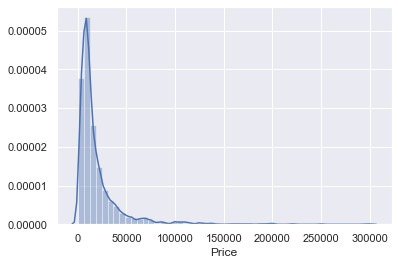

In [22]:
sns.distplot(data_nmv['Price'])

The price variable follows an exponential distribution as well as we can see that the outliers have greatly affected the distribution. The outliers affect the regression dramatically and cause the inflation of coefficients. We can deal with it by simply removing top 1% of the price observations.

In [33]:
top99 = data_nmv['Price'].quantile(0.99)


### Dealing with outliers

In [34]:
data_1 = data_nmv[data_nmv['Price'] < top99]

In [35]:
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


As of now we can see that maximum price is now acceptably closer than previous data frame.

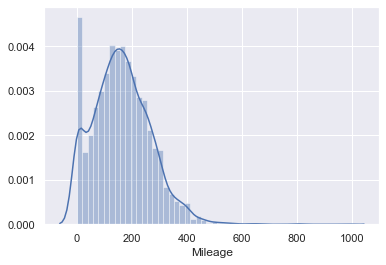

In [36]:
sns.distplot(data_nmv['Mileage'])

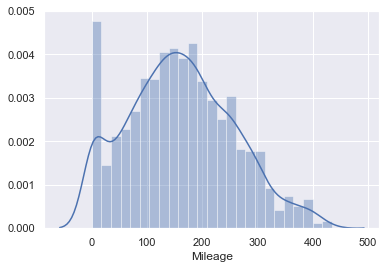

In [38]:
top99 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']  < top99]
sns.distplot(data_2['Mileage'])

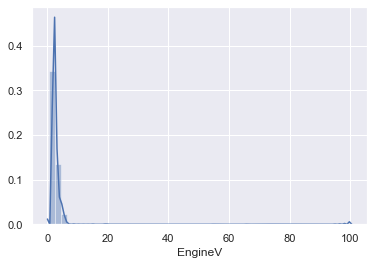

In [39]:
sns.distplot(data_2['EngineV'])

## Checking the OLS assumptions

### Relaxing the assumptions

### Multicollinearity

In [2]:
vif

NameError: name 'vif' is not defined

## Create dummy variables

### Rearrange a bit

In [ ]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

***

***

***

# EXERCISE

### Part 1
Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

### Part 2
As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).

### Part 3
Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

***

### Part 1 - Solution

Obviously, 'log_price' has a very high VIF. This implies it is most definitely **linearly correlated** with all the other variables. And this is no surprise! We are using a linear regression to determine 'log_price' given values of the independent variables! This is exactly what we expect - a linear relationship!

However, to actually assess multicollinearity for the predictors, we have to drop 'log_price'. The multicollinearity assumption refers only to the idea that the **independent variables** shoud not be collinear.

### Part 2 - Solution

As you can see, all VIFs are pretty much acceptable. The ones that are particularly high are 'EngineV' and 'Registration_yes'. 

We already discussed 'EngineV' in the lecture.

In the case of registration, the main issue is that **most values are 'yes'** so all types of problems come from there. One way this imbalance manifests is in multicollinearity. Remember that all independent variables are pretty good at determining 'log_price'? Well, if 'registration' is always 'yes', then if we predict 'log_price' we are predicting registration, too (it is going to be 'yes'). That is why, whenever a single category is so predominant, we may just drop the variable. 

Note that it will most probably be insignificant anyways.

### Part 3 - Solution

The result that we get is that very interesting indeed. Most VIFs are equal to **inf**, or plus infinity. 

We even got an warning: *RuntimeWarning: divide by zero encountered in double_scalars, vif = 1. / (1. - r_squared_i)*

The main reason is what we've discussed before. When a car is an 'Audi' all other brand dummies are 0. When a car is not 'Audi', at least one of them will be 1. By including all dummies have introduced multicollinearity (**perfect multicollinearity**)!!! 

If we run a regression including all these dummies, the coefficients would be inflated and completely off-mark. 

Now you see why we need to drop one of the dummy variables for each feature.